In [45]:
# Python ≥3.5 is required
import sys
import sklearn
import pandas as pd
import numpy as np
import os
import seaborn as sns

%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [46]:
df = pd.read_csv("weatherAUS.csv")

In [48]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [50]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [51]:
df = df.drop("RISK_MM", axis = 1)

In [52]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
train_set, validation_set = train_test_split(df, test_size=0.2, random_state=42)

In [53]:
validation_set.to_csv("rain_validation.csv")
train_set.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
17969,2009-10-14,NorahHead,15.1,23.9,0.0,NaN,NaN,SSW,67.0,NW,...,38.0,68.0,1001.9,1002.4,NaN,NaN,19.8,14.3,No,No
124769,2011-09-26,Walpole,9.7,14.2,7.6,NaN,NaN,WSW,50.0,WNW,...,91.0,56.0,1008.2,1007.7,NaN,NaN,11.1,13.4,Yes,Yes
39287,2010-04-20,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,...,79.0,63.0,1025.2,1021.5,6.0,5.0,21.2,24.0,No,No
127749,2011-07-12,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,...,52.0,45.0,1004.6,1001.4,NaN,NaN,11.1,12.9,No,No
40651,2015-04-13,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,...,69.0,52.0,1023.0,1021.2,6.0,2.0,18.8,20.6,No,No


In [54]:
df = train_set

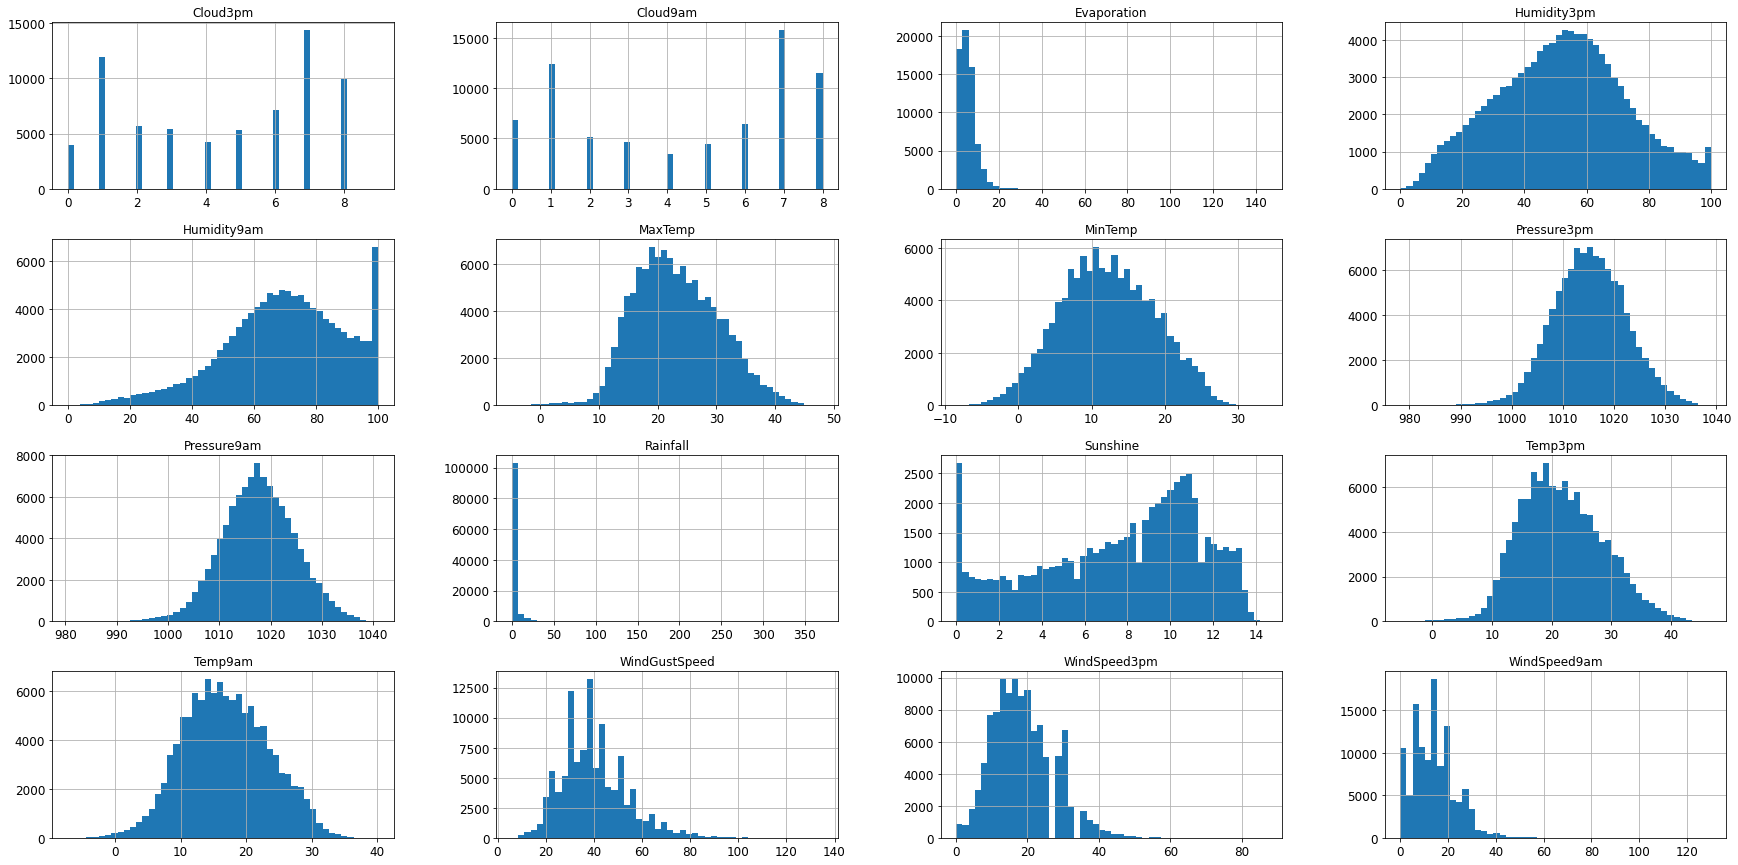

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,15))
plt.show()

In [43]:
df = train_set

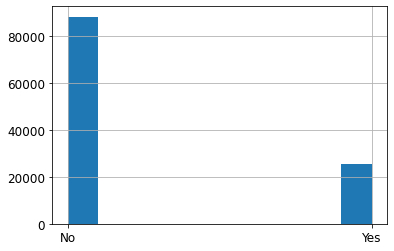

In [56]:
df["RainTomorrow"].hist()

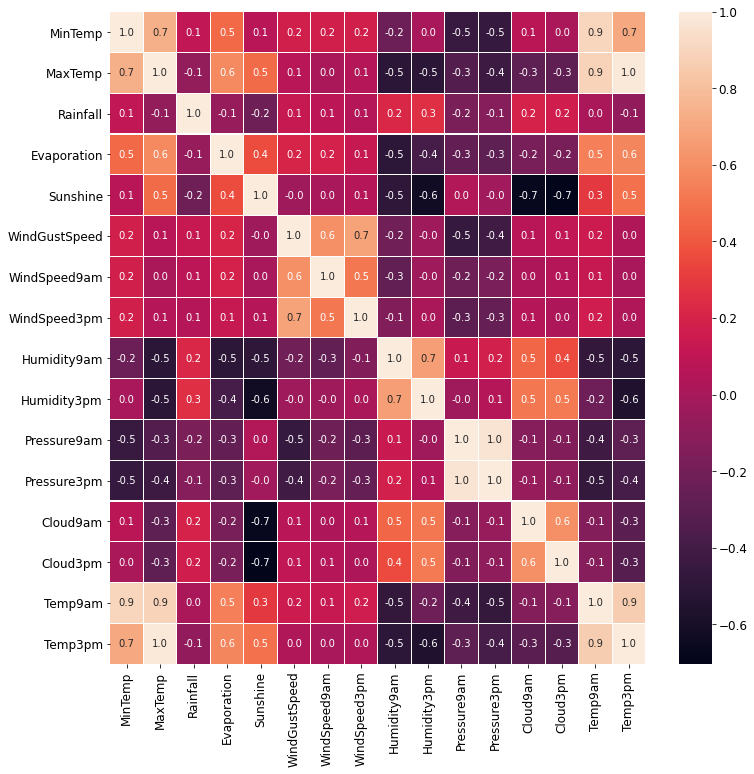

In [57]:
matrix_corr = df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(matrix_corr,annot=True, fmt=".1f",linewidths="0.1")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 17969 to 121958
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           113754 non-null  object 
 1   Location       113754 non-null  object 
 2   MinTemp        113229 non-null  float64
 3   MaxTemp        113486 non-null  float64
 4   Rainfall       112572 non-null  float64
 5   Evaporation    64963 non-null   float64
 6   Sunshine       59409 non-null   float64
 7   WindGustDir    106296 non-null  object 
 8   WindGustSpeed  106348 non-null  float64
 9   WindDir9am     105718 non-null  object 
 10  WindDir3pm     110731 non-null  object 
 11  WindSpeed9am   112671 non-null  float64
 12  WindSpeed3pm   111645 non-null  float64
 13  Humidity9am    112334 non-null  float64
 14  Humidity3pm    110841 non-null  float64
 15  Pressure9am    102497 non-null  float64
 16  Pressure3pm    102529 non-null  float64
 17  Cloud9am       70713 non-

In [72]:
num_columns = [ col for col in df.columns if df[col].dtype=="float64"]
cat_columns = [col for col in df.columns if df[col].dtype=="O"]


In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

a = imputer.fit_transform(df[num_columns])

In [74]:
num_var = pd.DataFrame(a, columns = num_columns, index = df.index)

In [75]:
num_var.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
17969,15.1,23.9,0.0,4.8,8.4,67.0,19.0,22.0,38.0,68.0,1001.9,1002.4,5.0,5.0,19.8,14.3
124769,9.7,14.2,7.6,4.8,8.4,50.0,15.0,28.0,91.0,56.0,1008.2,1007.7,5.0,5.0,11.1,13.4
39287,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,63.0,1025.2,1021.5,6.0,5.0,21.2,24.0
127749,7.6,14.8,0.0,4.0,7.0,94.0,30.0,35.0,52.0,45.0,1004.6,1001.4,5.0,5.0,11.1,12.9
40651,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,52.0,1023.0,1021.2,6.0,2.0,18.8,20.6


In [78]:
num_var.insert(0, "Date", df['Date'])

In [79]:
num_var.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
17969,2009-10-14,15.1,23.9,0.0,4.8,8.4,67.0,19.0,22.0,38.0,68.0,1001.9,1002.4,5.0,5.0,19.8,14.3
124769,2011-09-26,9.7,14.2,7.6,4.8,8.4,50.0,15.0,28.0,91.0,56.0,1008.2,1007.7,5.0,5.0,11.1,13.4
39287,2010-04-20,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,63.0,1025.2,1021.5,6.0,5.0,21.2,24.0
127749,2011-07-12,7.6,14.8,0.0,4.0,7.0,94.0,30.0,35.0,52.0,45.0,1004.6,1001.4,5.0,5.0,11.1,12.9
40651,2015-04-13,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,52.0,1023.0,1021.2,6.0,2.0,18.8,20.6


In [80]:
num_var.isna().sum()

Date             False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

In [86]:
cat_columns.remove('Date')
df[cat_columns].isna().sum()

Location        False
WindGustDir      True
WindDir9am       True
WindDir3pm       True
RainToday        True
RainTomorrow    False
dtype: bool

In [169]:
cat_var= df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [168]:
cat_var.isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [170]:
cat_var

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
17969,NorahHead,SSW,NW,W,No,No
124769,Walpole,WSW,WNW,W,Yes,Yes
39287,Williamtown,ENE,W,E,No,No
127749,Hobart,WNW,WNW,WNW,No,No
40651,Williamtown,S,SW,SSE,No,No
...,...,...,...,...,...,...
110268,Witchcliffe,W,WNW,W,Yes,Yes
119879,Perth,SW,SW,W,Yes,No
103694,Woomera,SSW,SSW,SSE,No,No
131932,Launceston,ESE,SSE,SE,No,Yes


In [171]:
dict = {"No": 0, "Yes": 1}
cat_var['RainTomorrow'] = cat_var['RainTomorrow'].map(dict)
cat_var['RainToday'] = cat_var['RainToday'].map(dict)

In [178]:
df_prepared = pd.concat([ 
                     pd.get_dummies(cat_var.Location), 
                     pd.get_dummies(cat_var.WindGustDir),
                     pd.get_dummies(cat_var.WindDir9am),
                     pd.get_dummies(cat_var.WindDir3pm),
                    cat_var[['RainToday', 'RainTomorrow']],
                   ], axis=1)

In [179]:
df_prepared

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,S,SE,SSE,SSW,SW,W,WNW,WSW,RainToday,RainTomorrow
17969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
124769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
39287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40651,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
119879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
103694,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [180]:
X_train = df_prepared.drop("RainTomorrow", axis = 1)
y_train = df_prepared['RainTomorrow']

In [181]:
y_train

17969     0
124769    1
39287     0
127749    0
40651     0
         ..
110268    1
119879    0
103694    0
131932    1
121958    0
Name: RainTomorrow, Length: 113754, dtype: int64

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,RainToday
17969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
124769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
39287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
119879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
103694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [184]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
#random forest
rfc=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [187]:
pred=rfc.predict(X_train)

In [189]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_train,pred))

Accuracy for Random Forest on CV data:  0.7758584313518645


In [ ]:
df